In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re

In [ ]:
# Practice number 1
chipo = pd.read_table('/Users/chris/Data/Pandas_exercises-master/chipotle.tsv')
chipo.head()

In [ ]:
chipo.info()

In [ ]:
chipo.shape[1]
chipo.columns
chipo.index

In [5]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [6]:
chipo['item_name'].nunique()

50

In [7]:
chipo['choice_description'].value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

In [8]:
chipo.quantity.sum()

4972

In [9]:
chipo['item_price'] = chipo.item_price.apply(lambda x: float(x[1:]))

In [10]:
(chipo.item_price * chipo.quantity).sum()

39237.02

In [11]:
chipo.order_id.nunique()

1834

In [12]:
chipo['total_Rev'] = (chipo.item_price * chipo.quantity)
chipo[['order_id', 'total_Rev']].groupby('order_id')['total_Rev'].sum().mean()

21.394231188658654

In [13]:
# Practice number 2
euro12 = pd.read_csv('/Users/chris/Data/Pandas_exercises-master/Euro2012.csv')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [14]:
goals = euro12.Goals
goals.head()

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [15]:
num_of_team = euro12.Team.nunique()
print(num_of_team)

16


In [16]:
print(len(euro12.columns))

35


In [17]:
discipline = euro12.loc[:, ['Team', 'Yellow Cards', 'Red Cards']]

In [18]:
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'])
discipline_sorted

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [19]:
discipline_yellow_card = discipline[['Team', 'Yellow Cards']].groupby('Team').mean().mean()
discipline_yellow_card

Yellow Cards    7.4375
dtype: float64

In [20]:
better_team = euro12[['Team', 'Goals']].query('Goals > 6')
better_team

,Team,Goals
5,Germany,10
13,Spain,12


In [21]:
G_team = euro12.Team[euro12.Team.str.startswith('G')]
G_team

5    Germany
6     Greece
Name: Team, dtype: object

In [22]:
first_seven_rows = euro12.iloc[:7]
first_seven_rows

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [23]:
excep_three_last_rows = euro12.iloc[:-3,]
excep_three_last_rows

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [24]:
find_SA = euro12.query("Team == ['England', 'Italy', 'Russia']")[['Team', 'Shooting Accuracy']]
find_SA

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [25]:
# Practice number 3
drinks = pd.read_csv('/Users/chris/Data/Pandas_exercises-master/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [26]:
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [27]:
continent_avg_beer = drinks[['continent', 'beer_servings']].groupby('continent').mean().sort_values(by=['beer_servings'], ascending=False)
continent_avg_beer.head(1)

,beer_servings
continent,
EU,193.777778


In [28]:
# continent_wine_mean = drinks[['wine_servings', 'continent']].pivot_table(index=['continent', 'wine_servings'])
continent_wine_mean = drinks.groupby('continent').mean()
continent_wine_mean

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [29]:
continent_wine_median = drinks.groupby('continent').median()
continent_wine_median

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


In [30]:
drinks.groupby('continent')['spirit_servings'].describe()[['mean', 'min', 'max']]

,mean,min,max
continent,,,
AF,16.339623,0.0,152.0
AS,60.840909,0.0,326.0
EU,132.555556,0.0,373.0
OC,58.437500,0.0,254.0
SA,114.750000,25.0,302.0


In [31]:
# Practice number 4
crime = pd.read_csv('/Users/chris/Data/Pandas_exercises-master/US_Crime_Rates_1960_2014.csv')
crime.head()

,Unnamed: 0,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [32]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
Unnamed: 0            55 non-null int64
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(13)
memory usage: 5.7 KB


In [33]:
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime = crime.set_index('Year')

In [34]:
crime.head()

,Unnamed: 0,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,,
1960-01-01,0,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,1,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,2,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,3,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,4,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [35]:
# I forgot it!
del crime['Total']

In [36]:
every_ten_year = crime.resample('10AS').sum()
population = crime.resample('10AS').max()
crime['Population'] = population
every_ten_year

,Unnamed: 0,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,45,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,145,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,245,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,345,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,445,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,260,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [37]:
# I don't know!
crime.idxmax(0)

Unnamed: 0           2014-01-01
Population           2010-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

In [38]:
# Practice number 5
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

In [39]:
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)

In [40]:
data_1_n_2_in_row = pd.concat([data1, data2], axis=0)
data_1_n_2_in_row

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [41]:
data_1_n_2_in_col = pd.concat([data1, data2], axis=1)
data_1_n_2_in_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [42]:
all_data = pd.concat([data1,data2],axis=0)
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [43]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [44]:
new_data = pd.merge(data_1_n_2_in_row, data3, how='left', on='subject_id')
new_data

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ackerman,15.0
2,3,Allen,Ali,15.0
3,4,Alice,Aoni,61.0
4,5,Ayoung,Atiches,16.0
5,4,Billy,Bonder,61.0
6,5,Brian,Black,16.0
7,6,Bran,Balwner,NaN
8,7,Bryce,Brice,14.0
9,8,Betty,Btisan,15.0


In [45]:
data1n2_inner = pd.merge(data1, data2, how='inner', on='subject_id')
data1n2_inner

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [46]:
data1n2_outer = pd.merge(data1, data2, how='outer', on='subject_id')
data1n2_outer

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [179]:
# Practice number 6
# Important!
df = pd.read_csv('/Users/chris/Data/Pandas_exercises-master/wind.csv', sep='\s+', parse_dates=[[0,1,2]],)
df['Yr_Mo_Dy'] = pd.to_datetime(df['Yr_Mo_Dy'])
df.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [186]:
def fix_year(df):
    year = df.year - 100 if df.year >= 2000 else df.year
    return year
df['Yr_Mo_Dy'].apply(fix_year)
df['Date'] = df.Yr_Mo_Dy.apply(fix_year)

AttributeError: 'numpy.ndarray' object has no attribute 'year'

In [160]:
df['Yr_Mo_Dy'] = pd.to_datetime(df['Yr_Mo_Dy'])
df = df.set_index(df['Yr_Mo_Dy'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6574 entries, 1961 to 1978
Data columns (total 13 columns):
Yr_Mo_Dy    6574 non-null int64
RPT         6568 non-null float64
VAL         6571 non-null float64
ROS         6572 non-null float64
KIL         6569 non-null float64
SHA         6572 non-null float64
BIR         6574 non-null float64
DUB         6571 non-null float64
CLA         6572 non-null float64
MUL         6571 non-null float64
CLO         6573 non-null float64
BEL         6574 non-null float64
MAL         6570 non-null float64
dtypes: float64(12), int64(1)
memory usage: 719.0 KB


In [146]:
# find how many data is null
print(df.isnull().sum())
print(df.count() - df.isnull().sum())

Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64
Yr_Mo_Dy    6574
RPT         6562
VAL         6568
ROS         6570
KIL         6564
SHA         6570
BIR         6574
DUB         6568
CLA         6570
MUL         6568
CLO         6572
BEL         6574
MAL         6566
dtype: int64


In [152]:
# avg wind speed
avg_wind_speed = df.mean().mean()
print('AVG Wind speed is ' + str(avg_wind_speed))

AVG Wind speed is 10.227982360836924


In [155]:
loc_stats = pd.DataFrame()
loc_stats['Max'] = df.max()
loc_stats['Min'] = df.min()
loc_stats['Mean'] = df.mean()
loc_stats['Standard'] = df.std()
loc_stats

,Max,Min,Mean,Standard
Yr_Mo_Dy,2068-12-31 00:00:00,1969-01-01 00:00:00,NaN,NaN
RPT,35.8,0.67,12.362987,5.618413
VAL,33.37,0.21,10.644314,5.267356
ROS,33.84,1.5,11.660526,5.008450
KIL,28.46,0,6.306468,3.605811
SHA,37.54,0.13,10.455834,4.936125
BIR,26.16,0,7.092254,3.968683
DUB,30.37,0,9.797343,4.977555
CLA,31.08,0,8.495053,4.499449
MUL,25.88,0,8.493590,4.166872


In [156]:
day_stats = pd.DataFrame()
day_stats['Max'] = df.max(axis=1)
day_stats['Min'] = df.min(axis=1)
day_stats['Mean'] = df.mean(axis=1)
day_stats['Standard'] = df.std(axis=1)
day_stats

,Max,Min,Mean,Standard
Yr_Mo_Dy,,,,
2061-01-01,18.50,9.29,13.018182,2.808875
2061-01-02,17.54,6.50,11.336364,3.188994
2061-01-03,18.50,6.17,11.641818,3.681912
2061-01-04,11.75,1.79,6.619167,3.198126
2061-01-05,13.33,6.17,10.630000,2.445356
...,...,...,...,...
1978-12-27,40.08,8.08,16.708333,7.868076
1978-12-28,41.46,5.00,15.150000,9.687857
1978-12-29,29.58,8.71,14.890000,5.756836


In [ ]:
df['Yr_Mo_Dy']
jan_avg_wind_speed = df.query

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [189]:
# Practice Number 7
titanic = pd.read_csv('/Users/chris/Data/Pandas_exercises-master/train.csv')
titanic = titanic.set_index('PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


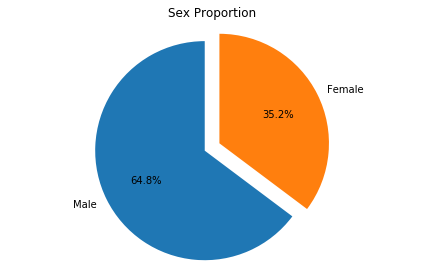

In [218]:
count_male = titanic.query('Sex == "male"')['Sex'].count()
count_female = titanic.query('Sex == "female"')['Sex'].count()
plt.pie([count_male, count_female], labels=['Male', 'Female'], autopct='%1.1f%%',startangle=90 ,explode=(0.15,0))
plt.axis('equal')
plt.title('Sex Proportion')
plt.tight_layout()
plt.show()

In [220]:
titanic.Survived.sum()

342

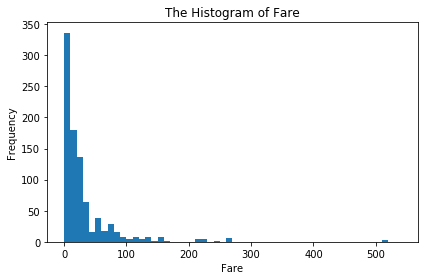

In [236]:
Fare = titanic.Fare.sort_values(ascending=False)
plt.hist(Fare, bins=range(0, 550, 10))
plt.title('The Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.tight_layout()

In [237]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

In [242]:
Pokemon = pd.DataFrame(raw_data)
Pokemon

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


In [241]:
Pokemon = Pokemon[['name', 'type', 'hp', 'evolution', 'pokedex']]
Pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [244]:
Pokemon['place'] = pd.DataFrame(['park','street','lake','forest'])
Pokemon

,name,evolution,type,hp,pokedex,place
0,Bulbasaur,Ivysaur,grass,45,yes,park
1,Charmander,Charmeleon,fire,39,no,street
2,Squirtle,Wartortle,water,44,yes,lake
3,Caterpie,Metapod,bug,45,no,forest


In [246]:
Pokemon.info()
Pokemon.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
name         4 non-null object
evolution    4 non-null object
type         4 non-null object
hp           4 non-null int64
pokedex      4 non-null object
place        4 non-null object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes


name         object
evolution    object
type         object
hp            int64
pokedex      object
place        object
dtype: object

In [288]:
apple = pd.read_csv('/Users/chris/Data/Pandas_exercises-master/appl_1980_2014.csv')
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [289]:
apple['Date'] = pd.to_datetime(apple.Date)
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [280]:
apple.index.is_unique

True

In [290]:
apple = apple.sort_index(ascending=True)
apple.head(15)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-19,28.25,28.38,28.25,28.25,12157600,0.44
1980-12-22,29.63,29.75,29.63,29.63,9340800,0.46
1980-12-23,30.88,31.00,30.88,30.88,11737600,0.48
1980-12-24,32.50,32.63,32.50,32.50,12000800,0.51


In [297]:
BM = apple.resample('BM').mean()
BM

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


In [299]:
(apple.index.max() - apple.index.min()).days

12261

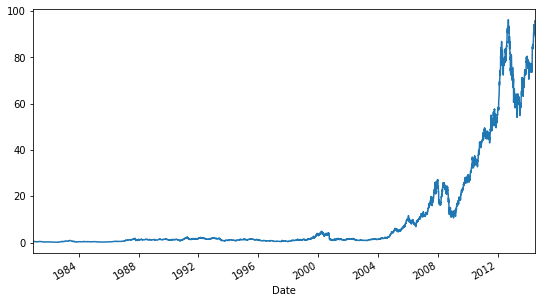

In [303]:
apple['Adj Close'].plot().get_figure().set_size_inches(9,5)